# Analise de Sentimentos - Eleições 2022

In [1]:
import tweepy as tw
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np 
  # Imports Libs
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
from deep_translator import GoogleTranslator

## Analisando dados Recentes dos candidatos

In [2]:
# Extraindo as credenciais da  API do Twitter 
bearer_token = ''
consumer_key = ''
consumer_secret = '' 
access_token = ''
access_token_secret = ''

In [9]:
# Inicializa o client via API
cliente = tw.Client(bearer_token=bearer_token, consumer_key=consumer_key, consumer_secret=consumer_secret, access_token=access_token, access_token_secret=access_token_secret )
# Realiza a pesquisa com o nome de eleições nos ultimos 5 dias 
resposta = cliente.search_recent_tweets(query="Eleições", start_time = '2022-02-18T00:00:12Z', end_time = '2022-02-22T23:59:01Z', max_results=100)

In [10]:
# Extrai os dados do resultado da api
dados = resposta.data
base =[] # Inicializa a lista 
for i in dados:
    texto = i.text
    
    linha= [0 for j in range(7)] # inicializa a lista linha

    linha[0] = str(texto) # preenche a primeira coluna com o texto 
    
    # Preenche a ultima coluna com os RTs
    if ('RT' in texto):
        posicao = texto.find(":")
        texto = texto[posicao+2:]
        linha[6]=1
    
    # Preenche cada coluna com 0 ou 1 nos casos onde cada candidato é mencionado
    linha[1] = 1 if ('bolsonaro' in texto.lower() or 'bozo' in texto.lower() or 'jair bolsonaro' in texto.lower()) else 0
    linha[2] = 1 if ('sergio moro' in texto.lower() or 'moro' in texto.lower() ) else 0
    linha[3] = 1 if ('joão doria' in texto.lower() or 'doria' in texto.lower() ) else 0
    linha[4] = 1 if ('lula' in texto.lower() or 'luiz inacio' in texto.lower() ) else 0
    linha[5] = 1 if ('ciro gomes' in texto.lower() or 'ciro' in texto.lower() ) else 0
    
    base.append(linha) # Adiciona no vetor base a linha achada


In [11]:
# Inicializa as listas necessárias e adiciona cada elemento nelas
lista_1 = []
lista_2 =[]
lista_3 = []
lista_4 = []
lista_5 = []
lista_6 = []
lista_7 =[]
for i in range(len(base)):
    #print(i)
    for j in range(len(base[i])):
        if j+1 == 1:
            lista_1.append(base[i][j])
        elif j+1 == 2: 
            lista_2.append(base[i][j])
        elif j+1 == 3: 
            lista_3.append(base[i][j])
        elif j+1 == 4: 
            lista_4.append(base[i][j])
        elif j+1 == 5: 
            lista_5.append(base[i][j])
        elif j+1 == 6: 
            lista_6.append(base[i][j])
        else:
            lista_7.append(base[i][j])
    
df = pd.DataFrame()
df['texto'] = lista_1
df['bolsonaro'] = lista_2
df['sergio moro'] = lista_3
df['joão doria'] = lista_4
df['lula'] = lista_5
df['ciro gomes'] = lista_6
df['RT'] = lista_7
df.head(5)

,texto,bolsonaro,sergio moro,joão doria,lula,ciro gomes,RT
0,RT @MarchaDaFamili1: @randolfeap Vai ter DPVAT...,0,0,0,1,0,1
1,"RT @DomingosBauru: Lei das Eleições, art. 33, ...",0,0,0,0,0,1
2,@JorgeBahl @SenadoFederal O fato do senado ser...,0,0,0,0,0,0
3,RT @salimmattarbr: A presidente do PT Gleisi H...,0,0,0,0,0,1
4,RT @DiegoRi66068907: 🇧🇷Se as eleições fossem h...,0,0,0,0,0,1


In [12]:
df_soma = df.sum()
df_soma_filter = df_soma.to_frame().reset_index()
df_soma_filter = df_soma_filter[1:-1].reset_index(drop=True)
df_soma_filter.head(8)

,index,0
0,bolsonaro,13
1,sergio moro,0
2,joão doria,2
3,lula,7
4,ciro gomes,0


In [13]:
df_soma_filter.columns

Index(['index', 0], dtype='object')

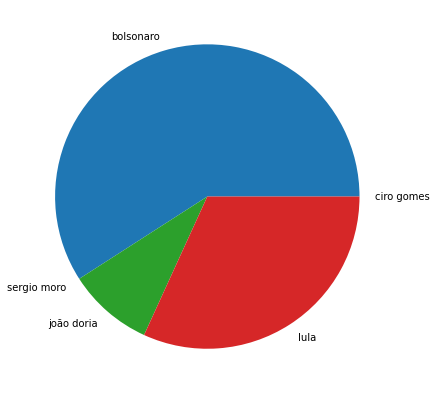

In [14]:

fig = plt.figure(figsize =(10, 7)) 
plt.pie(df_soma_filter[0].to_list(), labels = df_soma_filter['index'].to_list()) 
plt.show() 

## Realizando a Analise de Sentimentos

In [15]:
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = ''
        consumer_secret = ''
        access_token = ''
        access_token_secret = ''
  
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
            print(self)
        except:
            print("Error: Authentication Failed")
  
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
  
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        #print(tweet)
        #print(valor_clean)
        if len(tweet) >= 4000:
            print("\n\n")
            print(tweet)
            tweet_filtrado = tweet[:4000]
            print(tweet_filtrado)
            translated = GoogleTranslator(source='auto', target='en').translate(tweet_filtrado)
        else:
            try:
                translated = GoogleTranslator(source='auto', target='en').translate(tweet)
            except:
                print(len(tweet))
                print(tweet)
        valor_clean = self.clean_tweet(translated)
        #print(translated)
        analysis = TextBlob(valor_clean) 
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
  
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        print(query)
        # empty list to store parsed tweets
        tweets = []
  
        try:
            # call twitter api to fetch tweets
            fetched_tweets = []
            for status in tweepy.Cursor(self.api.search_tweets, q=query).items(1000):
                #print(status.id)
                #print("Qtd de Tweets: " + str(status))
                fetched_tweets.append(status)
            #print(len(lista))
            print("\n\n--------------------------------------------------------------\n\n\n")
            #fetched_tweets = self.api.search_tweets(q = query, count = count)
            #print(fetched_tweets)
            print(len(fetched_tweets))
            # parsing tweets one by one
            print("Qtd de Tweets: " + str(len(fetched_tweets)))
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
  
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
  
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
  
            # return parsed tweets
            return tweets
  
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
  

In [18]:
class TwitterClient(object):
    '''
    Classe Generica para analise de sentimentos
    '''
    def __init__(self):
        '''
        Classe construtora ou metodo de inicialização.
        '''
        # Chaves e tokens do Twitter Dev Console
        consumer_key = 'Tqd6LmZDS2uX0zKpgC8geWHGM'
        consumer_secret = 'iJbHvRXrYiWZMxH6RIjCnSxF7N3l7vYfrtS8pucSUW1OJNjQms'
        access_token = '1493398564155928579-MsqUvkhJjhsolsLibcroA37LvHsNu4'
        access_token_secret = 'IrcOWLyYHHnlZwkdMTvIYUg9dlpGpLIiUO4FahLjbnF4W'
  
        # Tentativa de autenticação
        try:
            # Criando um objeto OAuthHandler
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # Setando o access token e o access token secret
            self.auth.set_access_token(access_token, access_token_secret)
            # Criando uma tweepy api para poder extrair os twitters
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
  
    def clean_tweet(self, tweet):
        '''
        Função utilizado para limpar os textos do twitter por meio de remoção de links, caracteres especiais
        usando regras simples de regex.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
  
    def get_tweet_sentiment(self, tweet):
        '''
        Função de utilidade para classificar o sentimento do tweet passado 
        usando o método de sentimento do textblob
        '''        
        # Verificando se o tweet tem mais de 5k de caracteres
        if len(tweet) >= 4000:
            tweet_filtrado = tweet[:4000] # caso tenha, pega só os 5000 caracteres iniciais
            translated = GoogleTranslator(source='auto', target='en').translate(tweet_filtrado) # traduz o tweet em português para inglês
        else:
            translated = GoogleTranslator(source='auto', target='en').translate(tweet)
        
        # Limpa o texto de acordo com a função criada previamente
        valor_clean = self.clean_tweet(translated)
        
        # Criando um objeto TextBlob object para o texto do tweet passado
        analysis = TextBlob(valor_clean)
        
        # Verifica o sentimento do texto
        if analysis.sentiment.polarity > 0:
            return 'positivo'
        elif analysis.sentiment.polarity == 0:
            return 'neutro'
        else:
            return 'negativo'
  
    def get_tweets(self, query, count = 10):
        '''
        Função principal para poder pegar os tweets e tratar eles
        '''
        print("Query: " + str(query))
        # Lista vazia para poder armazenar os tweets analisados
        tweets = []
        
        try:
            # chama a api do twitter para poder pegar os tweets
            fetched_tweets = []
            for status in tweepy.Cursor(self.api.search_tweets, q=query).items(1000):
                fetched_tweets.append(status) # adiciona os tweets na lista 
            
            # Analisando os tweets um por um
            print("Qtd de Tweets a serem analisados: " + str(len(fetched_tweets)))
            for tweet in fetched_tweets:
                # Dicionário vazio para armazenar parametros requeridos do tweets
                parsed_tweet = {}
  
                # Salvando o texto do tweet
                parsed_tweet['text'] = tweet.text
                # Salvando o sentimento do tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
  
                # Adicionando o tweet analisado para a lista de tweets 
                if tweet.retweet_count > 0:
                    # se os tweets tiverem retweets, certifica de que ele seja adicionado apenas uma vez
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
  
            # retorna os tweets analisados
            return tweets
  
        except tweepy.TweepError as e:
            # printa error (se existir)
            print("Error : " + str(e))
  

Query: lula
Qtd de Tweets a serem analisados: 1000
Qtd de Tweets positivos: 183 
Porcentagem de tweets positivos: 34.014869888475836 %
Qtd de Tweets negativos: 88 
Porcentagem de tweets negativos: 16.356877323420075 %
Qtd de Tweets neutros: 267 
Porcentagem de tweets neutros: 49.62825278810409 %         


Tweets positivos:
RT @GeneralMourao: A liberdade de expressão é inviolável! Censurar a imprensa e o que os brasileiros falam nas mídias sociais, como deseja…
Boa noite!
Novo texto para a campanha individual.

Copie e colei:
Vou votar em Lula! Sou Lula!
Meta atingir 5.000 seguidores.

RT
RT @RaquelStasiaki: Lula pede para que ninguém compre a Eletrobrás porque ele quer roubar o máximo que ele puder caso ele retorne a Presidê…
RT @MitoB38: Arthur Lira, juntamente com alguns ministros do "Instituto Lula", mais popularmente conhecido como STF, querem mudar o sistema…
@julianefurno Desafio conciliar duas vertentes economicas praticamente opostas. A neoliberal praticada pelo governo… https

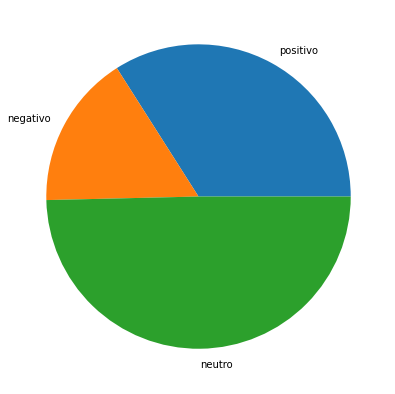

In [19]:
def main():
    # criando objeto da classe TwitterClient
    api = TwitterClient()
    # Chamando a função para poder pegar os tweets
    tweets = api.get_tweets(query = 'lula', count = 10000)
    
    # Pegar os tweets positivos de todos os tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positivo']
    # Porcentagem de tweets positivos 
    print("Qtd de Tweets positivos: {} ".format(len(ptweets)))
    print("Porcentagem de tweets positivos: {} %".format(100*len(ptweets)/len(tweets)))
    # Pegando os tweets negativos de todos os tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negativo']
    # Porcentagem de tweets negativos percentage of negative tweets
    print("Qtd de Tweets negativos: {} ".format(len(ntweets)))
    print("Porcentagem de tweets negativos: {} %".format(100*len(ntweets)/len(tweets)))
    # Porcentagem de tweets neutros
    print("Qtd de Tweets neutros: {} ".format(len(tweets) -(len( ntweets )+len( ptweets))))
    print("Porcentagem de tweets neutros: {} % \
        ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
  
    # printing first 5 positive tweets
    print("\n\nTweets positivos:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
  
    # printing first 5 negative tweets
    print("\n\nTweets negativos:")
    for tweet in ntweets[:10]:
        print(tweet['text'])
    
    fig = plt.figure(figsize =(10, 7)) 
    plt.pie([len(ptweets), len(ntweets), len(tweets) -(len( ntweets )+len( ptweets))], labels = ['positivo', 'negativo', 'neutro']) 
    plt.show() 
    
if __name__ == "__main__":
    # chamando a função principal
    main()

Query: bolsonaro
Qtd de Tweets a serem analisados: 1000
Qtd de Tweets positivos: 159 
Porcentagem de tweets positivos: 29.014598540145986 %
Qtd de Tweets negativos: 112 
Porcentagem de tweets negativos: 20.437956204379564 %
Qtd de Tweets neutros: 277 
Porcentagem de tweets neutros: 50.54744525547445 %         


Tweets positivos:
@DeputadoFederal SERIOOOO??? 
PROCURA ALGO MAIS ÚTIL PRA FAZER...A INVEJA Q TEM DE BOLSONARO DEVE DOER NÉ???
RT @leandroruschel: Na conversa como o PIB, no BTG, Bolsonaro deu a real: "quadrilha de volta, revogação de reformas, fim da autonomia do B…
RT @pavaneIas: numa escala de presidente bolsonaro a advogado do monark o quanto você trabalhou hoje
RT @ducavendish: O Bolsonaro e o Guedes estão indo MUITO bem no BTG Pactual CEO Conference.

Verdadeiro choque de realidade nos Faria Luler…
@mvpsantos @jairbolsonaro Até aí tudo normal. Surpresa zero, é  tudo esquerda. Agora bolsonaro estar nessa companhi… https://t.co/6lrdI2uIWH
RT @WilliamJacob: @salimmattarbr Sa

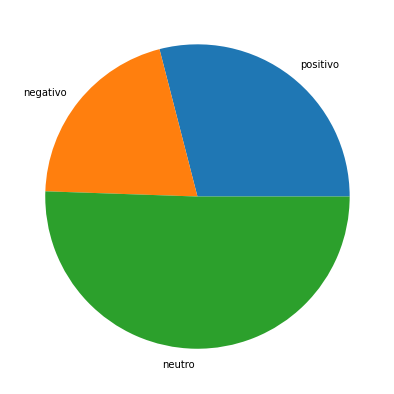

In [20]:
def main():
    # criando objeto da classe TwitterClient
    api = TwitterClient()
    # Chamando a função para poder pegar os tweets
    tweets = api.get_tweets(query = 'bolsonaro', count = 10000)
  
    # Pegar os tweets positivos de todos os tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positivo']
    # Porcentagem de tweets positivos 
    print("Qtd de Tweets positivos: {} ".format(len(ptweets)))
    print("Porcentagem de tweets positivos: {} %".format(100*len(ptweets)/len(tweets)))
    # Pegando os tweets negativos de todos os tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negativo']
    # Porcentagem de tweets negativos percentage of negative tweets
    print("Qtd de Tweets negativos: {} ".format(len(ntweets)))
    print("Porcentagem de tweets negativos: {} %".format(100*len(ntweets)/len(tweets)))
    # Porcentagem de tweets neutros
    print("Qtd de Tweets neutros: {} ".format(len(tweets) -(len( ntweets )+len( ptweets))))
    print("Porcentagem de tweets neutros: {} % \
        ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
  
    # printing first 5 positive tweets
    print("\n\nTweets positivos:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
  
    # printing first 5 negative tweets
    print("\n\nTweets negativos:")
    for tweet in ntweets[:10]:
        print(tweet['text'])
    
    fig = plt.figure(figsize =(10, 7)) 
    plt.pie([len(ptweets), len(ntweets), len(tweets) -(len( ntweets )+len( ptweets))], labels = ['positivo', 'negativo', 'neutro']) 
    plt.show() 
    
if __name__ == "__main__":
    # chamando a função principal
    main()

Query: Sergio Moro
Qtd de Tweets a serem analisados: 1000
Qtd de Tweets positivos: 62 
Porcentagem de tweets positivos: 27.80269058295964 %
Qtd de Tweets negativos: 42 
Porcentagem de tweets negativos: 18.83408071748879 %
Qtd de Tweets neutros: 119 
Porcentagem de tweets neutros: 53.36322869955157 %         


Tweets positivos:
RT @1989CuritibaL: ATENÇÃO!!!!

Hoje os ataques a Sérgio Moro nitidamente estão orquestrados.

Força e união pessoal!!! Vamos nos defender…
RT @kimpaim: 🚨🚨🚨 R$ 40 MILHÕES

TCU delega à PGR o BLOQUEIO imediato de bens do SÉRGIO MORO

R$ 40.000.000,00 é muito dinheiro! Moro meu fi…
RT @cirogomes: Sérgio Rolando Lero Moro é mesmo insuperável! Sem a mínima formação, começou sua campanha dizendo sandice após sandice. Depo…
RT @heldersalomao: TCU delega à PGR pedido de bloqueio imediato de bens do ex-juiz Sérgio Moro. Em despacho à Procuradoria-Geral da Repúbli…
RT @delucca: O carisma do Sérgio Moro é o de uma esponja do mar né?
RT @RubensNunesMBL: Diante os fatos exp

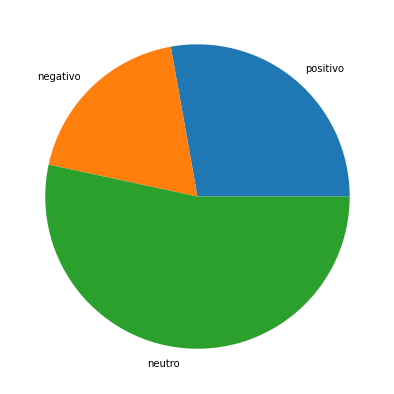

In [21]:
def main():
    # criando objeto da classe TwitterClient
    api = TwitterClient()
    # Chamando a função para poder pegar os tweets
    tweets = api.get_tweets(query = 'Sergio Moro', count = 10000)
  
    # Pegar os tweets positivos de todos os tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positivo']
    # Porcentagem de tweets positivos 
    print("Qtd de Tweets positivos: {} ".format(len(ptweets)))
    print("Porcentagem de tweets positivos: {} %".format(100*len(ptweets)/len(tweets)))
    # Pegando os tweets negativos de todos os tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negativo']
    # Porcentagem de tweets negativos percentage of negative tweets
    print("Qtd de Tweets negativos: {} ".format(len(ntweets)))
    print("Porcentagem de tweets negativos: {} %".format(100*len(ntweets)/len(tweets)))
    # Porcentagem de tweets neutros
    print("Qtd de Tweets neutros: {} ".format(len(tweets) -(len( ntweets )+len( ptweets))))
    print("Porcentagem de tweets neutros: {} % \
        ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
  
    # printing first 5 positive tweets
    print("\n\nTweets positivos:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
  
    # printing first 5 negative tweets
    print("\n\nTweets negativos:")
    for tweet in ntweets[:10]:
        print(tweet['text'])
    
    fig = plt.figure(figsize =(10, 7)) 
    plt.pie([len(ptweets), len(ntweets), len(tweets) -(len( ntweets )+len( ptweets))], labels = ['positivo', 'negativo', 'neutro']) 
    plt.show() 
    
if __name__ == "__main__":
    # chamando a função principal
    main()

Query: Doria
Qtd de Tweets a serem analisados: 1000
Qtd de Tweets positivos: 123 
Porcentagem de tweets positivos: 23.03370786516854 %
Qtd de Tweets negativos: 95 
Porcentagem de tweets negativos: 17.790262172284645 %
Qtd de Tweets neutros: 316 
Porcentagem de tweets neutros: 59.176029962546814 %         


Tweets positivos:
RT @RosngelaSanche4: João Doria @jdoriajr revogue o Decreto 65.021/20, cesse o confisco de até 16% de previdência, nos proventos dos aposen…
RT @revistaoeste: Doria diz não temer investigação da PF sobre compra de respiradores https://t.co/Dyo2EWFwqq
RT @RitaSil05233512: @Helenicebatist4 Mentiroso patológico, acha q o dinheiro é seu melhor patrimônio."Doria quer passar o povo em uma máqu…
RT @rafaelbboa: Conseguiram abafar completamente uma operação da PF contra o Governo Doria - Superfaturamento de centenas de milhões em ple…
RT @LuanSperandio: Apenas Bolsonaro e Lula possuem rejeição maior do que João Dória, segundo o @FuturaPesquisa.

Faz sentido?
RT @LuanSperan

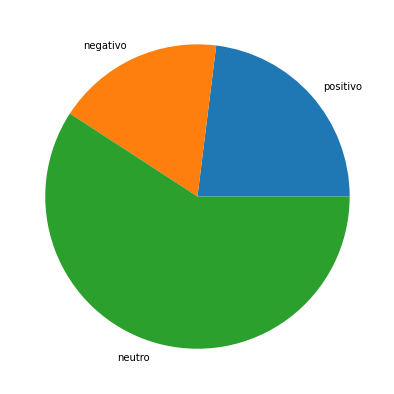

In [22]:
def main():
    # criando objeto da classe TwitterClient
    api = TwitterClient()
    # Chamando a função para poder pegar os tweets
    tweets = api.get_tweets(query = 'Doria', count = 10000)
  
    # Pegar os tweets positivos de todos os tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positivo']
    # Porcentagem de tweets positivos 
    print("Qtd de Tweets positivos: {} ".format(len(ptweets)))
    print("Porcentagem de tweets positivos: {} %".format(100*len(ptweets)/len(tweets)))
    # Pegando os tweets negativos de todos os tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negativo']
    # Porcentagem de tweets negativos percentage of negative tweets
    print("Qtd de Tweets negativos: {} ".format(len(ntweets)))
    print("Porcentagem de tweets negativos: {} %".format(100*len(ntweets)/len(tweets)))
    # Porcentagem de tweets neutros
    print("Qtd de Tweets neutros: {} ".format(len(tweets) -(len( ntweets )+len( ptweets))))
    print("Porcentagem de tweets neutros: {} % \
        ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
  
    # printing first 5 positive tweets
    print("\n\nTweets positivos:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
  
    # printing first 5 negative tweets
    print("\n\nTweets negativos:")
    for tweet in ntweets[:10]:
        print(tweet['text'])
    
    fig = plt.figure(figsize =(10, 7)) 
    plt.pie([len(ptweets), len(ntweets), len(tweets) -(len( ntweets )+len( ptweets))], labels = ['positivo', 'negativo', 'neutro']) 
    plt.show() 
    
if __name__ == "__main__":
    # chamando a função principal
    main()

Query: Ciro Gomes
Qtd de Tweets a serem analisados: 1000
Qtd de Tweets positivos: 85 
Porcentagem de tweets positivos: 36.324786324786324 %
Qtd de Tweets negativos: 25 
Porcentagem de tweets negativos: 10.683760683760683 %
Qtd de Tweets neutros: 124 
Porcentagem de tweets neutros: 52.99145299145299 %         


Tweets positivos:
RT @joao_milanineto: Ciro Gomes é aquele aluno do 1° ano do curso primário que fica jogando papelzinho nos outros para ver a briga.
@jornalnacional CIRO GOMES FICHA LIMPA SERÁ O PRÓXIMO PRESIDENTE DO BRASIL https://t.co/1DC2EJ2FtW
RT @ararazu1: Coisa bonita de se ouvir no JN. Acho que melhor que isso, só duas coisas:

1: "...e o departamento de jornalismo da Globo aca…
RT @PompeodeMattos: Ciro Gomes na Conferência do BTG falando sobre taxação de heranças e grandes fortunas.
Carregou aí? https://t.co/gguKB8…
RT @AnaKurama12: CIRO GOMES FICHA LIMPA SERÁ O PRÓXIMO PRESIDENTE DO BRASIL
#CiroFichaLimpa https://t.co/3heaTRldpA
@jfernandaBrasil @PDTsenado @cirogomes A

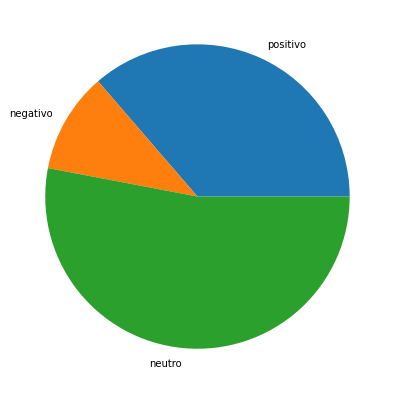

In [23]:
def main():
    # criando objeto da classe TwitterClient
    api = TwitterClient()
    # Chamando a função para poder pegar os tweets
    tweets = api.get_tweets(query = 'Ciro Gomes', count = 10000)
  
    # Pegar os tweets positivos de todos os tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positivo']
    # Porcentagem de tweets positivos 
    print("Qtd de Tweets positivos: {} ".format(len(ptweets)))
    print("Porcentagem de tweets positivos: {} %".format(100*len(ptweets)/len(tweets)))
    # Pegando os tweets negativos de todos os tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negativo']
    # Porcentagem de tweets negativos percentage of negative tweets
    print("Qtd de Tweets negativos: {} ".format(len(ntweets)))
    print("Porcentagem de tweets negativos: {} %".format(100*len(ntweets)/len(tweets)))
    # Porcentagem de tweets neutros
    print("Qtd de Tweets neutros: {} ".format(len(tweets) -(len( ntweets )+len( ptweets))))
    print("Porcentagem de tweets neutros: {} % \
        ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
  
    # printing first 5 positive tweets
    print("\n\nTweets positivos:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
  
    # printing first 5 negative tweets
    print("\n\nTweets negativos:")
    for tweet in ntweets[:10]:
        print(tweet['text'])
    
    fig = plt.figure(figsize =(10, 7)) 
    plt.pie([len(ptweets), len(ntweets), len(tweets) -(len( ntweets )+len( ptweets))], labels = ['positivo', 'negativo', 'neutro']) 
    plt.show() 
    
if __name__ == "__main__":
    # chamando a função principal
    main()

## Referências

https://medium.com/@empowerpython/criando-um-analisador-de-sentimentos-para-tweets-a53bae0c5147
https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
https://medium.com/analytics-vidhya/how-to-translate-text-with-python-9d203139dcf5
https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=278443377086&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1001655&gclid=CjwKCAiAgbiQBhAHEiwAuQ6BkrAIi5k_3pI6scIvAKKL3ajmUrGpM7UaIunhjXvTCB-WYJE1aGvcEhoCjgQQAvD_BwE
